

# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will investigate the dataset which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. In particular, we are interested in finding what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment. Additionally, we will analyze these factors to see how much they affect the result.

In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

The dataset has 110527 patients and 14 columns. 

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


describe() shows more statistics of the datasets. We can see that the average age is 37 and the majority of the patients are around 55 years old. The minimum age is -1 which should be fixed. Most of the patients don't have the Scholarship, Hipertension, Diabetes, Alcoholism and Handicap. However, most of the patients received the SMS. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This dataset does not have any missing value.

In [7]:
#Let's print the unique values to learn more about the dataset
print('Age:',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print("Neighbourhood",df.Neighbourhood.unique())
print('Scholarship:',df.Scholarship.unique())
print('Hipertension:',df.Hipertension.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Handcap:',df.Handcap.unique())
print('SMS_received:',df.SMS_received.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Neighbourhood ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃ

Firstly, we can see that the one of the value (-1) in 'Age' column needs to be fixed. Also, it will be more clear if we convert the 'Neighborhood' values from string type to int. We will also do this to 'No-show' values.

### Data Cleaning
> In this part, we will fix Negative values in 'Age' column and convert the string type values to int.

In [8]:
#Check how many negative values in 'Age'
df.query('Age == -1').Age.nunique()

1

In [9]:
#Fix negative values in 'Age' column: since there is only one, it's okay to drop it
df.drop(df[df.Age < 0].index, inplace=True)

In [10]:
#Some factors probably does not have much correlation with the result, so we can drop them.

In [11]:
df.drop(['AppointmentID','PatientId','ScheduledDay','AppointmentDay'],axis=1, inplace=True)


In [12]:
df.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


So we dropped the four columns: 'PatientId', 'AppointmentID', 'ScheduledDay' and 'AppointmentDay'.

In [13]:
df.Neighbourhood.nunique()

81

There are 81 different Neighbourhoods

In [14]:
#There are 81 different Neighbourhoods, it's more clear to use int represent different neighbourhoods
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Neighbourhood'])
df['Neighbourhood'] = le.transform(df['Neighbourhood'])

In [15]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,39,0,1,0,0,0,0,No
1,M,56,39,0,0,0,0,0,0,No
2,F,62,45,0,0,0,0,0,0,No
3,F,8,54,0,0,0,0,0,0,No
4,F,56,39,0,1,1,0,0,0,No


Now, the 'Neighbourhood' is represented in integer. 

In [16]:
#Let's firstly rename column name from 'No-show' to 'No_show'
df.columns
df = df.rename(columns={'No-show': 'No_show'})

In [17]:
#Then, we seperate the data into two groups: "show" and "no-show".
Show = df.No_show == 'No'
No_show = df.No_show == 'Yes'

In [18]:
#Then, we seperate the data into two groups: "show" and "no-show".
show = df[df.No_show == 'No']
no_show = df[df.No_show == 'Yes']

In [19]:
df.No_show.replace(('Yes', 'No'), (1, 0), inplace=True)
df.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,39,0,1,0,0,0,0,0
1,M,56,39,0,0,0,0,0,0,0
2,F,62,45,0,0,0,0,0,0,0
3,F,8,54,0,0,0,0,0,0,0
4,F,56,39,0,1,1,0,0,0,0


So now in the 'No_show' column, '1' represents the patient didn't show up, '0' represents the patient showed up.

<a id='eda'></a>
## Exploratory Data Analysis

> We explore the dataset by studying the following two questions.

### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? What are the relation of No Show with these factors?)

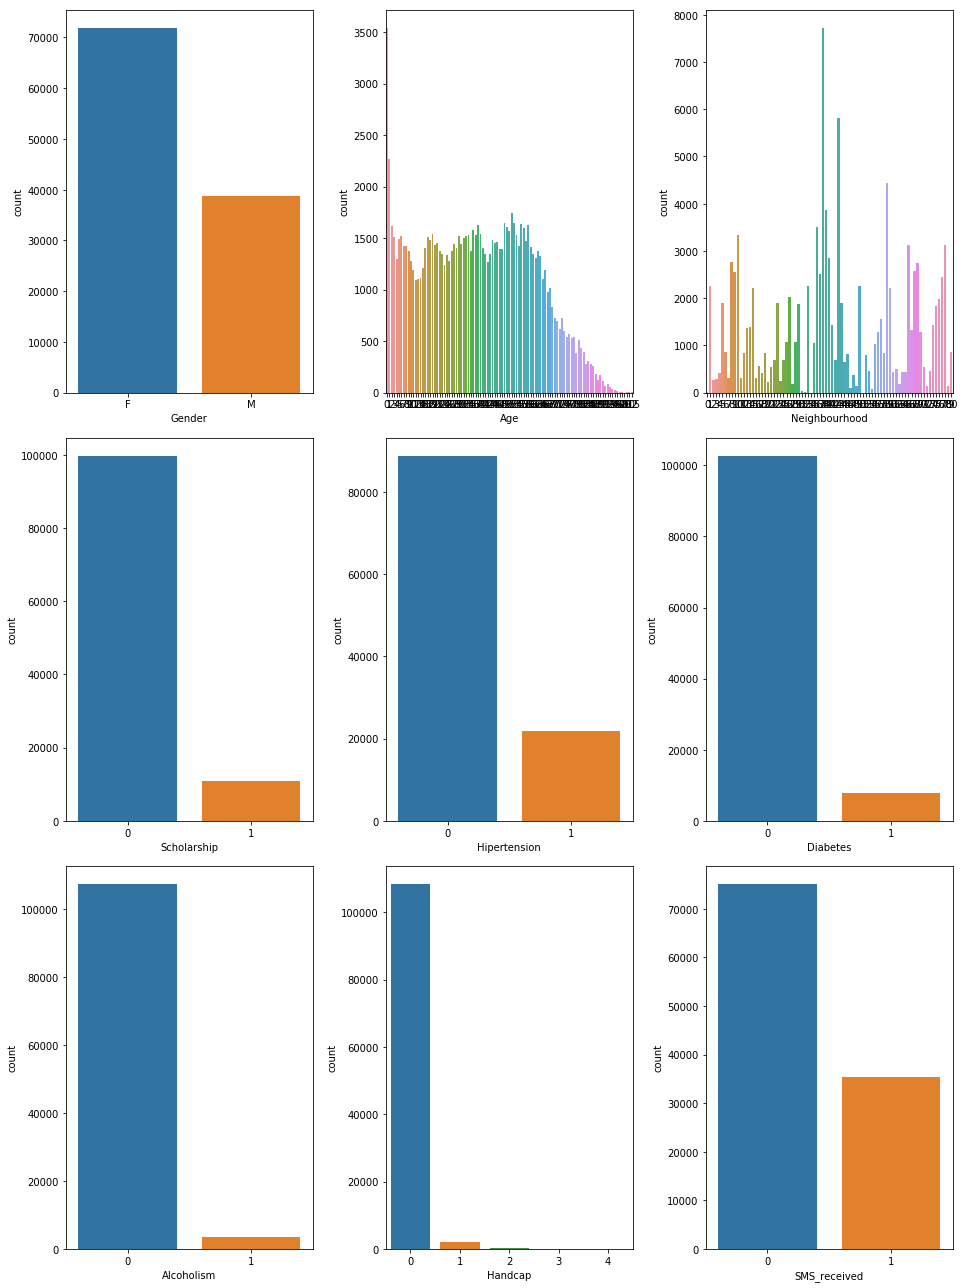

In [20]:
#Let's firstly explore the data distribution by plotting it.
plt.figure(figsize=(13.5,18))
gs = gridspec.GridSpec(3, 3)

features = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

for i, feature in enumerate(features):
    ax = plt.subplot(gs[(i // 3), (i % 3)])
    sns.countplot(df[feature], ax=ax)

plt.tight_layout()
plt.show()

We can see that the number of female patients is around twice larger than male patients. The majority of the patients don't have scholarship, hipertension, diabetes, alcoholism or Handicap. Around one third of the patients received the SMS. 

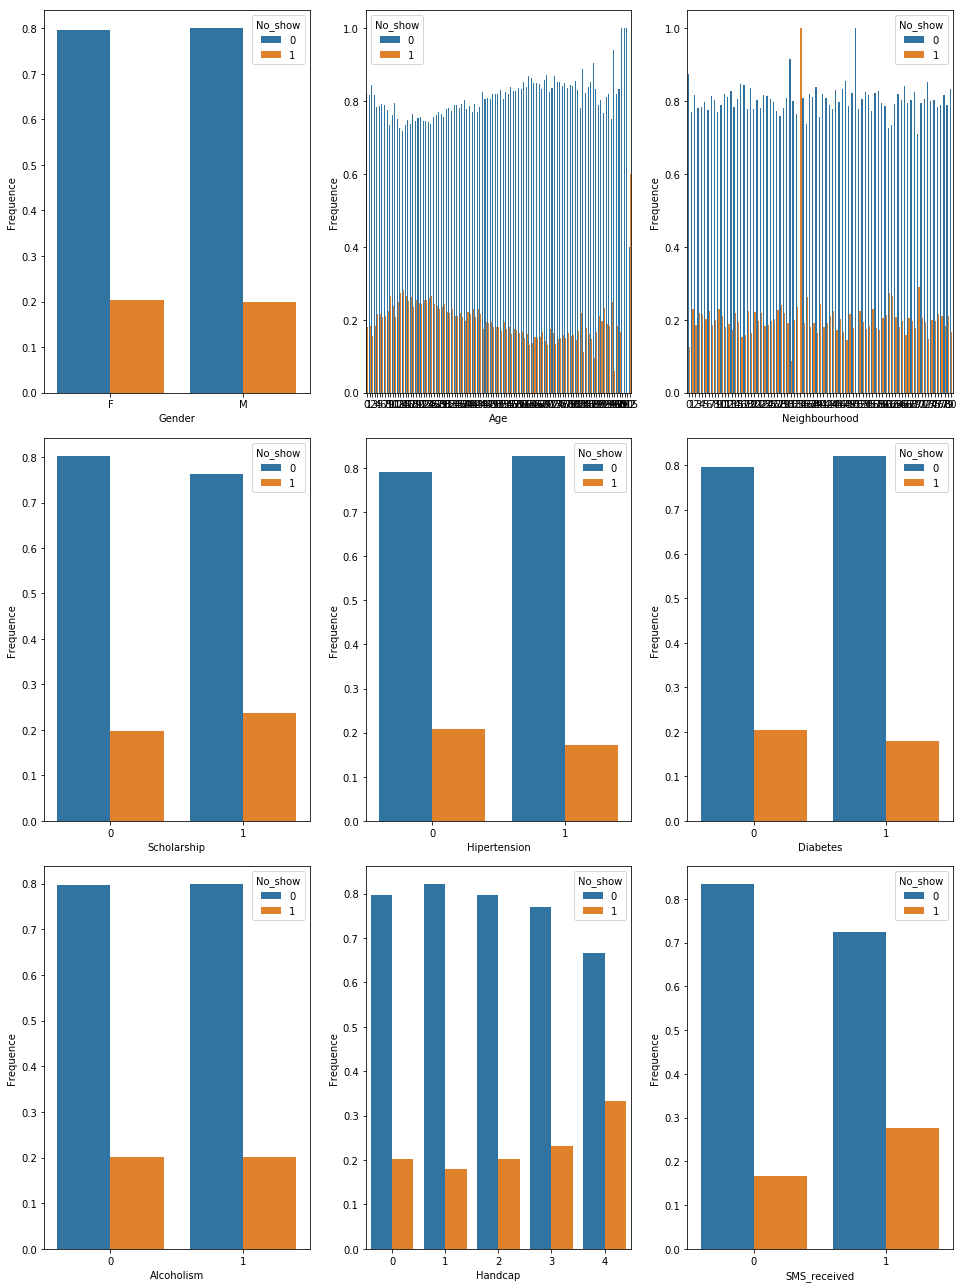

In [21]:
#In order to find out the correlation between these factors with the 'No_show' result, it's important to plot 
# Show/No-Show Distribution on each factors.

plt.figure(figsize=(13.5,18))
gs = gridspec.GridSpec(3, 3)

features = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

for i, feature in enumerate(features):
    
    feature_counts = (df.groupby([feature])["No_show"]
                            .value_counts(normalize=True)
                            .rename('frequence')
                            .reset_index()
                            .sort_values(feature))
    
    ax = plt.subplot(gs[(i // 3), (i % 3)])
    plot = sns.barplot(x=feature, y="frequence", hue="No_show",
                       data=feature_counts, ax=ax)
    plot.set_ylabel("Frequence")
    plot.set_xlabel(feature)

plt.tight_layout()
plt.show()

From the Show/No show distribution on each factor, we can make the following observations:
1. The 'No_show' result distribution on male and female are very close, which means the Gender is not correlated enough with the output.
2. Generally, the number of patient who didn't show up increases as the age decreases and the number of patient who showed up increases as the age increases. However, there are some exceptions which worth investigating later. 
3. There is one neighbourhood has very high frequency of 'no_show' and one neighbourhood has very high frequency of 'show'. But generally, the 'neigbourhood' factor is not correlated enough with the output.
4. In the patients who have scholarship, the frequency of 'no_show' is higher. 
5. The frequency of 'no_show' is higher in the group which doesn't have hipertension. 
6. The frequency of 'no_show' is higher in the group which doesn't have diabetes.
7. The 'No_show' result distributions on the group which has alcoholism and the group which doesn't have alcoholism are very close, which means the alcoholism is not correlated enough with the output. 
8. The patients have higher handicap have higher frequency of 'no_show'.
9. The frequency of 'no_show' is higher in the group which receives SMS.

Therefore, we can conclude that generally the factors including 'Scholarship', 'hipertension', 'diabetes', 'handicap' and 'SMS_reveived' are important for us to know in order to predict if a patient will show up for their scheduled appointment.

### Research Question 2  (Explore more about the age factor to see is there significant difference in age of patient those who showed up and those who did not show up.)

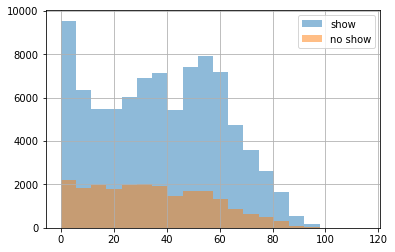

In [25]:
#Let's plot 'show' and 'no show' histogram at different ages
df.Age[Show].hist(alpha=0.5, bins=20, label='show')
df.Age[No_show].hist(alpha=0.5, bins=20, label='no show');
plt.legend();

It is not very easy to tell from the above plot the difference in age of patient who showed up or did not showed up. So let’s explore more.

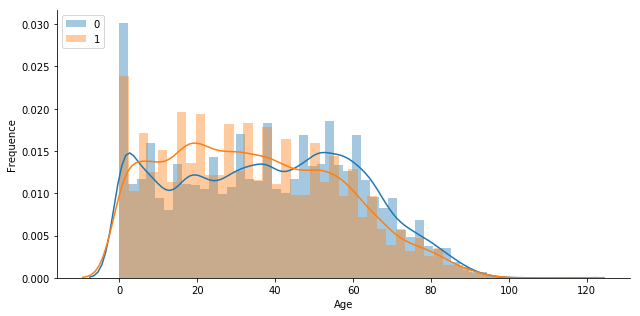

In [23]:
#To see the 'Age' distribution more clearly
ax = sns.FacetGrid(df, hue="No_show", size=4.5, aspect=2)
ax = ax.map(sns.distplot, "Age", kde=True)
ax.set_ylabels("Frequence")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

From the above plot, we can see that the 'age' factor does have a substantial effect on the 'no_show' result. 

In [26]:
df.Age[Show].mean()

37.790504154999034

In [27]:
df.Age[No_show].mean()

34.317666562121957

So there is significant difference in age of patient those who showed up and those who did not show up. We can further confirm it by plotting the histogram.

The above plot confirms the previous finding that significant difference exists in age of patient those who showed up and those who did not show up.

<a id='conclusions'></a>
## Conclusions

> The factors including 'Age', 'Scholarship', 'hipertension', 'diabetes', 'handicap' and 'SMS_reveived' are important for us to know in order to predict if a patient will show up for their scheduled appointment.

> Significant difference exists in age of patient those who showed up and those who did not show up.

> Limitations: The above analysis excludes the factors including 'PatientId', 'AppointmentID', 'ScheduledDay' and 'AppointmentDay', which might have effect on the results. Also, there is no statistical tests in the current study. 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0